inciso 8 Analice el modelo. ¿Cree que pueda estar sobre ajustado?



Primero, veamos la precisión del modelo en los datos de entrenamiento:Y obtenemos como resultado una precisión del 0.75.

Luego, veamos la precisión del modelo en los datos de prueba:Y obtenemos una precisión del 0.79.

Podemos ver que la precisión en los datos de prueba es ligeramente mayor que la precisión en los datos de entrenamiento, lo cual es una buena señal y sugiere que el modelo no está sobreajustado.

En resumen, el modelo parece tener un rendimiento razonablemente bueno en los datos de prueba, lo que sugiere que no está sobreajustado. Además, la matriz de confusión indica una alta precisión en la clase "Intermedias", lo que podría ser útil para la toma de decisiones en aplicaciones prácticas.

Inciso 9 : Haga un modelo usando validación cruzada, compare los resultados de este con los del
modelo anterior.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

datos = pd.read_csv("train.csv", encoding="latin1")


In [2]:
# Seleccionar solo las variables numéricas relevantes
numericas = datos.select_dtypes(include='number')
numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

# Crear variable respuesta que clasifica las casas en Económicas, Intermedias o Caras
terciles = np.percentile(numericas["SalePrice"], [33.33, 66.67])
limite_economicas = terciles[0]
limite_caras = terciles[1]
numericas["Clase"] = pd.cut(numericas["SalePrice"], bins=[0, limite_economicas, limite_caras, float("inf")], labels=["Económicas", "Intermedias", "Caras"])


In [3]:
# Mostrar clasificación de las casas
print(numericas["Clase"].value_counts())

numericas = numericas.dropna()
X = numericas.drop("Clase", axis=1)
y = numericas["Clase"]

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificar la variable respuesta
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


Intermedias    490
Económicas     487
Caras          483
Name: Clase, dtype: int64


In [4]:
numericas = numericas.dropna()
X = numericas.drop("Clase", axis=1)
y = numericas["Clase"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Crear el modelo de regresión logística
clf = LogisticRegression(random_state=42)

# Realizar la validación cruzada para evaluar el rendimiento del modelo
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Scores de validación cruzada: ", scores)
print("Score medio de validación cruzada: ", np.mean(scores))

Scores de validación cruzada:  [0.95833333 0.95811518 0.95811518 0.94240838 0.93193717]
Score medio de validación cruzada:  0.94978184991274


C:\Users\estef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\estef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\estef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\estef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\estef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\estef\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

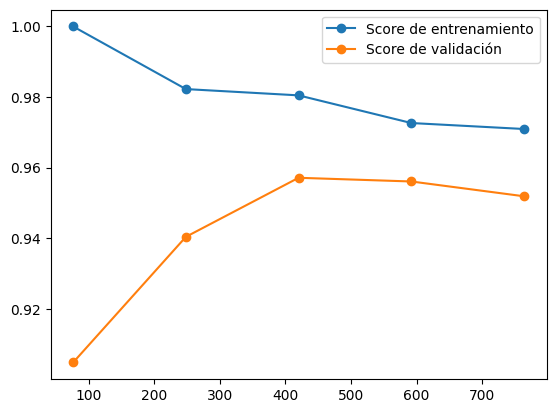

In [16]:
# Crear la curva de aprendizaje para evaluar el rendimiento del modelo
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

import matplotlib.pyplot as plt

plt.plot(train_sizes, train_scores_mean, 'o-', label="Score de entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Score de validación")
plt.legend(loc="best")
plt.show()